In [1]:
%matplotlib inline

In [2]:
import os
import zipfile
import geopandas as gpd
import requests
import fnmatch
import pandas as pd

In [3]:
print(gpd.__version__)
print(pd.__version__)

0.4.0
0.23.4


## Descargar archivos
El INDEC en su página [0], publica los shapefiles de las provincias a través de un selector desplegable que nos presenta el nombre de la provincia
Vamos a descargar estos shapefiles por separado y luego combinarlos para obtener el mapa de Argentina completo

[0] https://www.indec.gov.ar/codgeo.asp

Intentamos descargar uno solo con la lib request:

In [4]:
# una provincia:
lugar = 'Catamarca'
# la url:
url = 'https://www.indec.gov.ar/ftp/cuadros/territorio/codgeo/Codgeo_{}_con_datos.zip'.format(lugar)
# pedimos y guardamos:
r = requests.get(url, allow_redirects=True)
open('{}-shapefile-radio-censal.zip'.format(lugar), 'wb').write(r.content)

268400

Descargamos un zip que posee los archivos básicos correspondientes al formato shapefile.

In [5]:
# unzipeamos:
zip_ref = zipfile.ZipFile('{}-shapefile-radio-censal.zip'.format(lugar), 'r')
zip_ref.extractall('.')
zip_ref.close()

Luego de descomprimirlo, lo dibujamos:

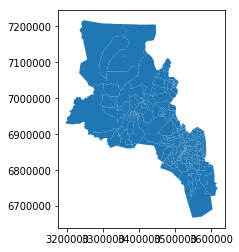

In [6]:
gpd.read_file('Catamarca_con_datos.shp').plot()

El proximo paso es guardar en un alista los nombres de las provincias para descargarlas en un loop.

Cuestiones a tener en cuenta:
    - Sin acentos
    - Si posee mas de una palabra --> separar con guión bajo
    - 'Ciudad autonoma de Bs As' --> 'CABA'
    - 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' --> 'Tierra del Fuego' 

In [7]:
provincias_codenames = [
    'Buenos_Aires',
    'CABA',
    'Catamarca',
    'Chaco',
    'Chubut',
    'Cordoba',
    'Corrientes',
    'Entre_Rios',
    'Formosa',
    'Jujuy',
    'La_Pampa',
    'La_Rioja',
    'Mendoza',
    'Misiones',
    'Neuquen',
    'Rio_Negro',
    'Salta',
    'San_Juan',
    'San_Luis',
    'Santa_Cruz',
    'Santa_Fe',
    'Santiago_del_Estero',
    'Tierra_del_Fuego',
    'Tucuman'
]

In [8]:
# Path carpeta de descarga:
path = "output/{}"
url = 'https://www.indec.gov.ar/ftp/cuadros/territorio/codgeo/Codgeo_{}_con_datos.zip'

In [9]:
for provincia in provincias_codenames:
    print("buscando: {}...".format(provincia))
    # solicitud del recurso:
    r = requests.get(url.format(provincia),
                     allow_redirects=True)
    # creamos output/nombre_provincia 
    carpeta_provincia = path.format(provincia)
    os.mkdir( carpeta_provincia )
    # guardamos output/nombre_provincia/nombre_provincia-shapefile-radio-censal.zip
    nombre_archivo = carpeta_provincia + '/{}-shapefile-radio-censal.zip'.format(provincia)
    open(nombre_archivo, 'wb').write(r.content)

    # unzipeamos:
    zip_ref = zipfile.ZipFile(nombre_archivo, 'r')
    zip_ref.extractall(carpeta_provincia)
    zip_ref.close()

buscando: Buenos_Aires...
buscando: CABA...
buscando: Catamarca...
buscando: Chaco...
buscando: Chubut...
buscando: Cordoba...
buscando: Corrientes...
buscando: Entre_Rios...
buscando: Formosa...
buscando: Jujuy...
buscando: La_Pampa...
buscando: La_Rioja...
buscando: Mendoza...
buscando: Misiones...
buscando: Neuquen...
buscando: Rio_Negro...
buscando: Salta...
buscando: San_Juan...
buscando: San_Luis...
buscando: Santa_Cruz...
buscando: Santa_Fe...
buscando: Santiago_del_Estero...
buscando: Tierra_del_Fuego...
buscando: Tucuman...


In [10]:
os.listdir('output/')

['San_Luis',
 'Chubut',
 'Entre_Rios',
 'Buenos_Aires',
 'Mendoza',
 'Cordoba',
 'Santa_Cruz',
 'La_Rioja',
 'Catamarca',
 'Santiago_del_Estero',
 'Formosa',
 'Salta',
 'La_Pampa',
 'Tierra_del_Fuego',
 'CABA',
 'Chaco',
 'Corrientes',
 'Rio_Negro',
 'Tucuman',
 'Neuquen',
 'San_Juan',
 'Santa_Fe',
 'Jujuy',
 'Misiones']

In [11]:
os.listdir('output/Chubut/')

['Chubut_con_datos.prj',
 'Chubut_con_datos.shp',
 'nota aclaratoria.pdf',
 'Chubut_con_datos.dbf',
 'Chubut-shapefile-radio-censal.zip',
 'Chubut_con_datos.qpj',
 'Chubut_con_datos.shx']

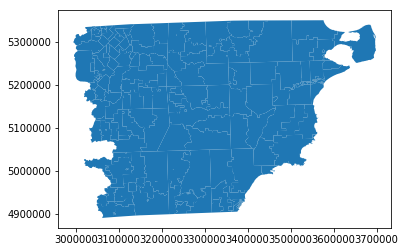

In [12]:
gpd.read_file('output/Chubut/Chubut_con_datos.shp').plot()

In [13]:
for file in os.listdir('output/Chubut/'):
    if fnmatch.fnmatch(file, '*.shp'):
        print(file)

Chubut_con_datos.shp


Recorremos los archivos descargados y vamos recolectando los geodataframes de las provincias

In [14]:
shp_provincias = []
for provincia in provincias_codenames:
    for shapefile in os.listdir('output/{}/'.format(provincia)):
        if fnmatch.fnmatch(shapefile, '*.shp'):
            shp_provincias.append(gpd.read_file('output/{}/{}'.format(provincia, shapefile)))             

Concatenamos los geodataframes:

In [15]:
argentina_radios_censales = gpd.GeoDataFrame( pd.concat( shp_provincias, ignore_index=True) )

/home/lmorales/.virtualenvs/py3-sci/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


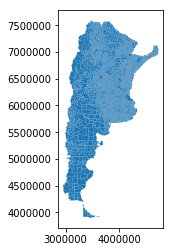

In [16]:
argentina_radios_censales.plot()

In [17]:
argentina_radios_censales.head()

,AREA,DEPTO,FRAC,HOGARES,LINK,MUJERES,PAIS0210_,PAIS0210_I,PERIMETER,PROV,...,VIV_PART_H,geometry,hogares,link,mujer,toponimo_i,totalpobl,varon,viv_part_h,viviendasp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((4142783.714723475 6204147.298600595,...",485.0,068821704,1006.0,331355.0,2003.0,997.0,460.0,483.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((4011946.218818666 5760129.431971583,...",17.0,060141201,25.0,334455.0,56.0,31.0,17.0,32.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((4011381.454649603 6127277.808280964,...",58.0,060210206,79.0,334456.0,177.0,98.0,58.0,76.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((3737590.165526731 5925087.549518262,...",64.0,060070107,112.0,334452.0,216.0,104.0,63.0,97.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((4023680.185215585 6113674.126661565,...",26.0,060210609,41.0,334458.0,80.0,39.0,26.0,49.0


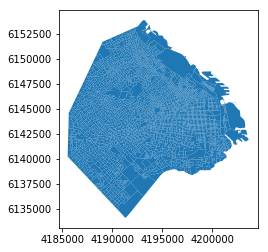

In [18]:
argentina_radios_censales[argentina_radios_censales.AREA.notna()].plot()

In [19]:
caba = argentina_radios_censales[argentina_radios_censales.AREA.notna()]

In [20]:
caba.to_file('saved/caba.shp')

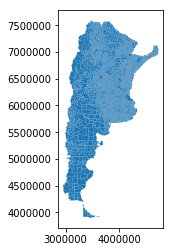

In [21]:
argentina_radios_censales[argentina_radios_censales.AREA.isna()].plot()

In [22]:
arg_sin_caba = argentina_radios_censales[argentina_radios_censales.AREA.isna()]
arg_sin_caba.to_file('saved/arg_sin_caba.shp')

## Limpiar gdf:

Las columnas con NaN vienen del gdf de CABA, que posee columnas adicionales en comparación con las que presentan los demás gdfs.
Se las quitamos.

In [23]:
[ (n, p) for n, p  in enumerate(argentina_radios_censales.columns.values)]

[(0, 'AREA'),
 (1, 'DEPTO'),
 (2, 'FRAC'),
 (3, 'HOGARES'),
 (4, 'LINK'),
 (5, 'MUJERES'),
 (6, 'PAIS0210_'),
 (7, 'PAIS0210_I'),
 (8, 'PERIMETER'),
 (9, 'PROV'),
 (10, 'RADIO'),
 (11, 'TIPO'),
 (12, 'TOT_POB'),
 (13, 'VARONES'),
 (14, 'VIV_PART'),
 (15, 'VIV_PART_H'),
 (16, 'geometry'),
 (17, 'hogares'),
 (18, 'link'),
 (19, 'mujer'),
 (20, 'toponimo_i'),
 (21, 'totalpobl'),
 (22, 'varon'),
 (23, 'viv_part_h'),
 (24, 'viviendasp')]

In [24]:
argentina_radios_censales.columns.values[16:]

array(['geometry', 'hogares', 'link', 'mujer', 'toponimo_i', 'totalpobl',
       'varon', 'viv_part_h', 'viviendasp'], dtype=object)

In [25]:
argentina_radios_censales = argentina_radios_censales[ argentina_radios_censales.columns.values[16:] ]

Y guardamos el país completo por radios censales:

In [26]:
argentina_radios_censales.to_file('saved/argentina-radios-censales.shp')